# Introduction à la Science des données
## Travail pratique 03 – Outils pour le calcul scientifique II

## 2. Base de données d’animaux
#### Kevin Ferati & Elliot Ganty

In [546]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

#### 1) Créez un notebook pour lire la base de données et générez un dataframe.

In [547]:
raw_data = pd.read_csv("animals.txt", sep="\t")
MASS_COL = "5-1_AdultBodyMass_g"
raw_data

,MSW05_Order,MSW05_Family,MSW05_Genus,MSW05_Species,MSW05_Binomial,1-1_ActivityCycle,5-1_AdultBodyMass_g,8-1_AdultForearmLen_mm,13-1_AdultHeadBodyLen_mm,2-1_AgeatEyeOpening_d,...,26-6_GR_MinLong_dd,26-7_GR_MidRangeLong_dd,27-1_HuPopDen_Min_n/km2,27-2_HuPopDen_Mean_n/km2,27-3_HuPopDen_5p_n/km2,27-4_HuPopDen_Change,28-1_Precip_Mean_mm,28-2_Temp_Mean_01degC,30-1_AET_Mean_mm,30-2_PET_Mean_mm
0,Artiodactyla,Camelidae,Camelus,dromedarius,Camelus dromedarius,3.0,492714.47,-999.0,-999.00,-999.00,...,-999.00,-999.00,-999,-999.00,-999.0,-999.00,-999.00,-999.00,-999.00,-999.00
1,Carnivora,Canidae,Canis,adustus,Canis adustus,1.0,10392.49,-999.0,745.32,-999.00,...,-17.53,13.00,0,35.20,1.0,0.14,90.75,236.51,922.90,1534.40
2,Carnivora,Canidae,Canis,aureus,Canis aureus,2.0,9658.70,-999.0,827.53,7.50,...,-17.05,45.74,0,79.29,0.0,0.10,44.61,217.23,438.02,1358.98
3,Carnivora,Canidae,Canis,latrans,Canis latrans,2.0,11989.10,-999.0,872.39,11.94,...,-168.12,-117.60,0,27.27,0.0,0.06,53.03,58.18,503.02,728.37
4,Carnivora,Canidae,Canis,lupus,Canis lupus,2.0,31756.51,-999.0,1055.00,14.01,...,-171.84,3.90,0,37.87,0.0,0.04,34.79,4.82,313.33,561.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,Rodentia,Muridae,Zyzomys,argurus,Zyzomys argurus,-999.0,40.42,-999.0,107.83,-999.00,...,114.33,131.09,0,1.10,0.0,0.02,62.33,256.75,692.93,1704.98
5412,Rodentia,Muridae,Zyzomys,maini,Zyzomys maini,-999.0,93.99,-999.0,-999.00,-999.00,...,131.45,132.66,0,0.17,0.0,0.00,90.76,265.30,877.90,1755.73
5413,Rodentia,Muridae,Zyzomys,palatilis,Zyzomys palatilis,-999.0,123.00,-999.0,-999.00,-999.00,...,136.72,137.08,0,0.00,0.0,-999.00,49.00,247.16,637.90,1638.67
5414,Rodentia,Muridae,Zyzomys,pedunculatus,Zyzomys pedunculatus,-999.0,100.00,-999.0,126.79,-999.00,...,130.16,132.97,0,0.09,0.0,0.25,21.64,215.72,291.82,1405.85


#### 2) Prenez la masse corporelle (en grammes) des animaux à leur âge adulte (colonne « 5-1_AdultBodyMass_g »).

In [548]:
adult_body_mass_g = raw_data[MASS_COL]
print("%s masses corporelles trouvées" % (len(adult_body_mass_g)))
adult_body_mass_g

5416 masses corporelles trouvées


0       492714.47
1        10392.49
2         9658.70
3        11989.10
4        31756.51
          ...    
5411        40.42
5412        93.99
5413       123.00
5414       100.00
5415        95.02
Name: 5-1_AdultBodyMass_g, Length: 5416, dtype: float64

#### 3) Observez la distribution des valeurs, 
calculez la valeur minimale, 
la valeur maximale, 
la moyenne et la médiane.
Vérifiez s’il y a des valeurs manquantes, des valeurs aberrantes, etc.

In [574]:
def filter_values(column_name, threshold, source=raw_data, isHigher=True):
    return (source[source[column_name] > threshold]) if isHigher else (source[source[column_name] < threshold])

def g_to_kg(val):
    return val / 1000

In [648]:
min_val = adult_body_mass_g.min()
print("Masse corporelle minimale: %s (%s kg) " % (min_val, g_to_kg(min_val)))
#--------------------------------
max_val = adult_body_mass_g.max()
print("Masse corporelle maximale: %s (%s kg) " % (max_val, g_to_kg(max_val)))
#--------------------------------
mean_val = adult_body_mass_g.mean()
print("Masse corporelle moyenne: %s (%s kg) " % (mean_val, g_to_kg(mean_val)))
#--------------------------------
median_val = adult_body_mass_g.median()
print("Médiane masse corporelle: %s (%s kg) " % (median_val, g_to_kg(median_val)))
#--------------------------------
print("%s valeurs manquantes" % (adult_body_mass_g.isnull().sum()))

#--------------------------------
max_element = raw_data[raw_data[MASS_COL] == max_val].squeeze()
print("l'animal trouvé avec la plus grande masse corporelle est : %s %s " % 
      (max_element["MSW05_Species"], max_element["MSW05_Family"]))

# en étudiant ce résultat on peut se rendre compte qu'il s'agit de la baleine bleue 
# il n'y a donc pas besoin de fixer une limite haute car cette valeur n'est pas aberrante

#--------------------------------
# on part du principe que les valeurs négatives sont des valeurs aberrantes,
filtered_data = filter_values(MASS_COL, 0)
print("%s valeurs sont retenues (> 0) sur %s valeurs" % (len(filtered_data), len(raw_data)))

#--------------------------------
filtered_adult_body_mass_g = filtered_data[MASS_COL]
min_val_after_filter = filtered_adult_body_mass_g.min()
print("Masse corporelle minimale + FILTRE : %s (%s kg) " % (min_val_after_filter, g_to_kg(min_val_after_filter)))
min_element = filtered_data[filtered_adult_body_mass_g == min_val_after_filter].squeeze()
print("l'animal trouvé avec la plus petite masse corporelle est : %s %s " % 
      (min_element["MSW05_Species"], min_element["MSW05_Family"]))

# En étudiant ce résultat on peut se rendre compte qu'il s'agit de la Chauve-souris bourdon, connue pour ne peser qu'environ
# 2 grammes 
# (ref: https://fr.wikipedia.org/wiki/Kitti_%C3%A0_nez_de_porc)
# il n'y a donc pas besoin de fixer une limite basse plus haute que zéro car cette valeur n'est pas aberrante

Masse corporelle minimale: -999.0 (-0.999 kg) 
Masse corporelle maximale: 154321304.5 (154321.3045 kg) 
Masse corporelle moyenne: 115940.09211964569 (115.9400921196457 kg) 
Médiane masse corporelle: 23.125 (0.023125 kg) 
0 valeurs manquantes
l'animal trouvé avec la plus grande masse corporelle est : musculus Balaenopteridae 
3542 valeurs sont retenues (> 0) sur 5416 valeurs
Masse corporelle minimale + FILTRE : 1.96 (0.00196 kg) 
l'animal trouvé avec la plus petite masse corporelle est : thonglongyai Craseonycteridae 


#### 4) Générez un histogramme des masses corporelles.
#### Q6. Que pouvez-vous conclure à partir de cet histogramme ?

In [567]:
import matplotlib.pyplot as plt
def plotCaracteristic(source, xAxis, yAxis, title, log_val=False):
    df_source = pd.DataFrame(source)
    plt.figure()
    pd.DataFrame.hist(df_source, figsize=(12,8), log=log_val)
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)
    plt.title(title)
    plt.show()

<Figure size 432x288 with 0 Axes>

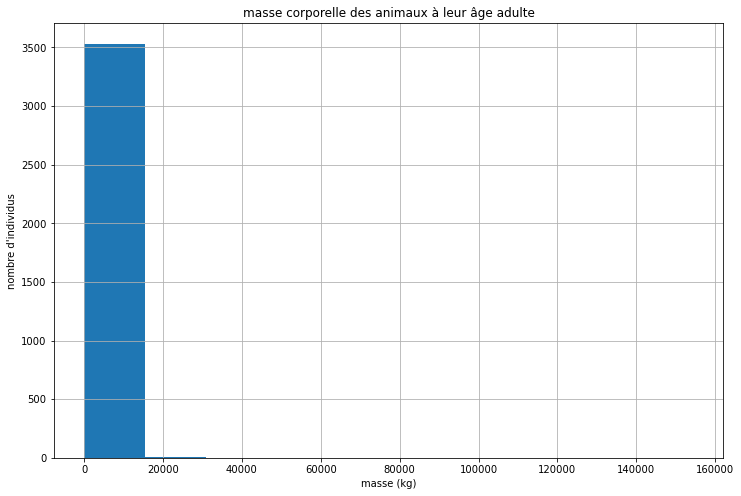

<Figure size 432x288 with 0 Axes>

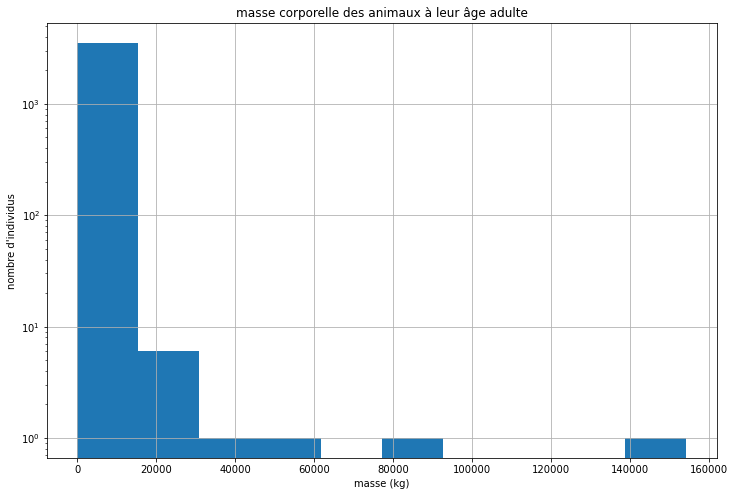

9 masses de plus de 20 tonnes trouvées sur 5416 valeurs


In [646]:
plotCaracteristic(filtered_adult_body_mass_g.apply(lambda x: g_to_kg(x)), "masse (kg)", "nombre d'individus",
                  "masse corporelle des animaux à leur âge adulte")

#un histogramme tel quel n'est donc pas très lisible, on réessaie avec une autre échelle
plotCaracteristic(filtered_adult_body_mass_g.apply(lambda x: g_to_kg(x)), "masse (kg)", "nombre d'individus",
                  "masse corporelle des animaux à leur âge adulte", True)

print("%s masses de plus de 20 tonnes trouvées sur %s valeurs" % (len(filter_values(MASS_COL, 20000000)), len(raw_data)))

#### Q6 
On observe une distribution asymétrique, on a une asymétrie positive du au fait que la queue de distribution s'étend vers la
droite, donc la majeur partie des animaux ont une masse corporelle variant entre 0 et 20 tonnes.
On a d'ailleurs calulé le nombre de masses plus grandes sous l'histogramme.

#### 5) Générez un histogramme des masses corporelles, mais pour les animaux qui n’atteignent pas les 50Kg à leur âge adulte.
#### Q7. Que pouvez-vous conclure à partir de cet histogramme ?

<Figure size 432x288 with 0 Axes>

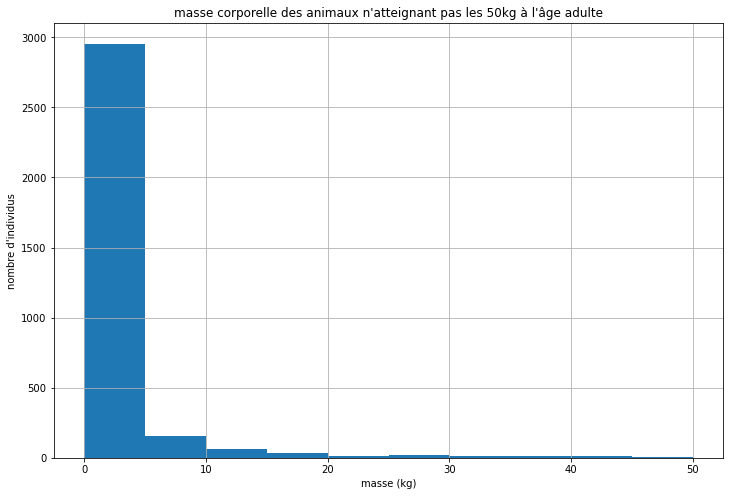

3287 masses de moins de 50 kg sur 3542 valeurs


In [644]:
less_than_50_kg = filter_values(MASS_COL, 50000, filtered_data, False)
plotCaracteristic(less_than_50_kg[MASS_COL].apply(lambda x: g_to_kg(x)), "masse (kg)", "nombre d'individus",
                  "masse corporelle des animaux n'atteignant pas les 50kg à l'âge adulte")

print("%s masses de moins de 50 kg sur %s valeurs" % (len(less_than_50_kg), len(filtered_data)))

#### Q7
On remarque ainsi que la majeure partie des animaux pèsent moins de 50 kilos
et on peut même se rendre compte avec l'histogramme que la majeure partie des animaux pèsent en fait moins de 5 kg !

on a calculé et noté cette proportion sur la base des nombres strictement positifs sous l'histogramme.

on a déjà pu présentir ceci en se rendant compte que moyenne et médiane avaient des valeurs très différentes 
(115kg(moyenne) VS 23g(médiane)), signe que la moyenne, sensible aux valeurs extrêmes a été tirée vers le haut à case de 
certaines mesures très grandes sans se rendre compte qu'elles n'étaient que minoritaires.
La médiane au contraire s'est révélé être un indicateur plus robuste, indiquant une valeur plus cohérente compte tenus de
la distribution de valeurs observée ici.

# 3. Loi de Benford

#### 1) Prenez la masse corporelle (en grammes) des animaux à leur âge adulte (colonne « 5-1_AdultBodyMass_g ») après filtrage des données manquantes ou  aberrantes.

In [578]:
# => filtered_adult_body_mass_g, déjà calculé contient la colonne des masses filtrées pour n'avoir
# que des valeurs strictement positives.

#### 2) Extrayez le chiffre le plus significatif de la masse corporelle des animaux.

In [579]:
def extract_first_digit(values_source):
    df = pd.DataFrame(data={"value": values_source})
    df["digit"] = df["value"].astype(str).str[0].astype(int)
    return df

In [580]:
df_mass_with_digits = extract_first_digit(filtered_adult_body_mass_g)
df_mass_with_digits

,value,digit
0,492714.47,4
1,10392.49,1
2,9658.70,9
3,11989.10,1
4,31756.51,3
...,...,...
5411,40.42,4
5412,93.99,9
5413,123.00,1
5414,100.00,1


#### 3) Calculez la fréquence d’apparition de chaque digit pour l‘ensemble d’animaux

In [582]:
def group_digits(df_with_digits):
    digit_groups = df_with_digits.groupby("digit")
    return(digit_groups.count(), digit_groups.groups.keys())

In [583]:
def frequency_dataframe(df_with_digits_to_count, total_count):
    digit_groups_values, digits_keys = group_digits(df_with_digits_to_count)
    df_grouping_result = pd.DataFrame(data={"digit": digits_keys, 
                                            "absolute_frequency": digit_groups_values.to_numpy().squeeze()})
    df_grouping_result["relative_frequency"] = ((df_grouping_result["absolute_frequency"] * 100) / total_count)
    return df_grouping_result

In [589]:
df_mass_result = frequency_dataframe(df_mass_with_digits, len(filtered_adult_body_mass_g))
print(df_mass_result)
print("nombre de valeurs considérérées au total : %s" % (len(filtered_adult_body_mass_g)))

   digit  absolute_frequency  relative_frequency
0      1                 977           27.583286
1      2                 656           18.520610
2      3                 379           10.700169
3      4                 401           11.321287
4      5                 266            7.509881
5      6                 243            6.860531
6      7                 249            7.029927
7      8                 217            6.126482
8      9                 154            4.347826
nombre de valeurs considérérées au total : 3542


#### 4) Comparer vos résultats avec la loi de Benford. Présentez une bar chart présentant cette comparaison. 
#### Q8. Que pouvez-vous observer ? Commentez vos résultats.

In [655]:
benford_distribution = np.array([30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6])
def plotBenfordPlotComparison(digits_keys, results):
    df = pd.DataFrame(data={"digits": digits_keys,
                            "expected frequency": benford_distribution,
                            "observed frequency": results})
    print(df)
    df.plot.bar(rot=0, x="digits")

   digits  expected frequency  observed frequency
0       1                30.1           27.583286
1       2                17.6           18.520610
2       3                12.5           10.700169
3       4                 9.7           11.321287
4       5                 7.9            7.509881
5       6                 6.7            6.860531
6       7                 5.8            7.029927
7       8                 5.1            6.126482
8       9                 4.6            4.347826


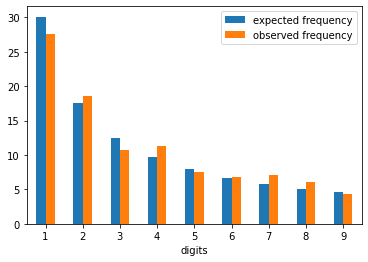

In [656]:
plotBenfordPlotComparison(df_mass_result["digit"], df_mass_result["relative_frequency"])

#### Q8
on remarque que la distribution de la masse corporelle (en grammes) 
des animaux à leur âge adulte suit approximativement la loi de Benford

#### 5) Essayez une autre variable pour vérifier si elle répond à la loi de Benford. 
#### Q9. Commentez vos résultats.

In [638]:
# on choisit la variable indiquant le nombre de jour avant l'ouverture des yeux après la naissance
EYE_OPENING_COL = "2-1_AgeatEyeOpening_d"

# on filtre les valeurs négatives d'office, on pose la limite basse à 1 pour simplifier les calculs de digits par la suite,
# on n'enlève de toute façon que quelques valeurs en procédant ainsi :
print("valeurs entre 0 et 1 non compris : %s" % (raw_data[EYE_OPENING_COL].between(0,1, inclusive="neither").sum()))

age_at_eye_opening = filter_values(EYE_OPENING_COL, 1)[EYE_OPENING_COL]

valeurs entre 0 et 1 non compris : 3


In [639]:
# tests / filtres supplémentaires des valeurs

# on check s'il manque des valeurs, on voit que non
print("%s valeurs manquantes" % (age_at_eye_opening.isnull().sum()))

max_val = age_at_eye_opening.max()
print("valeur maximale: %s jours" % (max_val))
max_element = filtered_data_on_eyes_opening[age_at_eye_opening == max_val].squeeze()
print("l'animal avec la valeur maximale est : %s %s " % (max_element["MSW05_Species"], max_element["MSW05_Family"]))

# on remarque que la valeur max est de environ 5 mois avant d'ouvrir les yeux et que l'espèce concernée est le 
# Wallaby à cou rouge, après quelque recherche il semble que le petit wallaby passe environ ce même temps dans la poche
# de sa mère après la naissance, ce qui peut indiquer que cette valeur n'est pas anormale
# (ref: https://fr.wikipedia.org/wiki/Wallaby_%C3%A0_cou_rouge)

0 valeurs manquantes
valeur maximale: 153.5 jours
l'animal avec la valeur maximale est : rufogriseus Macropodidae 


   digits  expected frequency  observed frequency
0       1                30.1           49.171271
1       2                17.6           18.232044
2       3                12.5           10.773481
3       4                 9.7            2.762431
4       5                 7.9            1.657459
5       6                 6.7            2.209945
6       7                 5.8            4.143646
7       8                 5.1            4.143646
8       9                 4.6            6.906077


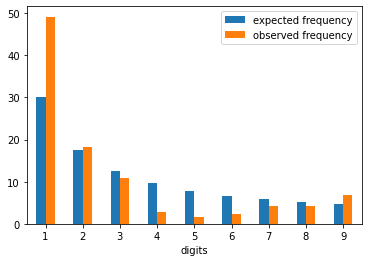

In [657]:
df_eyes_with_digits = extract_first_digit(age_at_eye_opening)
df_eyes_result = frequency_dataframe(df_eyes_with_digits, len(age_at_eye_opening))

plotBenfordPlotComparison(df_eyes_result["digit"], df_eyes_result["relative_frequency"])

#### Q9
On remarque que la loi de benford ne semble pas s'appliquer exactement dans ce deuxième cas, 
peut-être car la distribution est plus chaotique que la distribution des masses
qui semblait suivre une loi exponentielle

Début d'explication trouvée dans Wikipedia :
'It tends to be most accurate when values are distributed across multiple orders of magnitude, especially if the process generating the numbers is described by a power law (which is common in nature).'
(https://en.wikipedia.org/wiki/Benford%27s_law)

En étudiant les histogrammes ci-dessous on voit que la distribution des masses suit plus ou moins une loi de puissance mentionnée alors que la 2ème distribution ne la suit pas.

<Figure size 432x288 with 0 Axes>

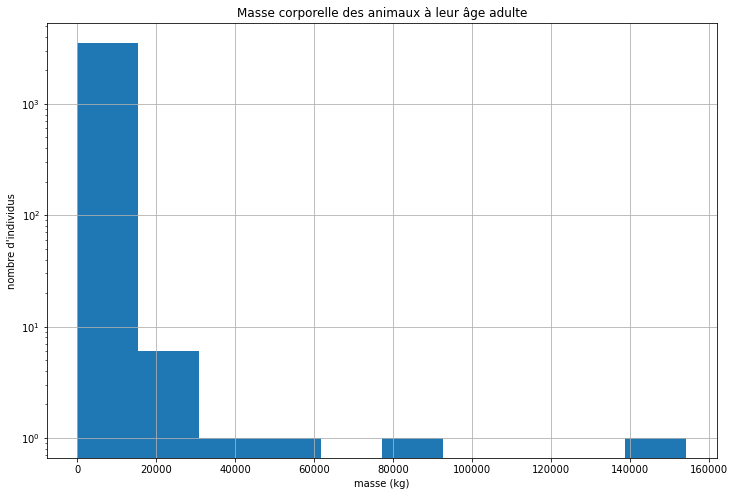

<Figure size 432x288 with 0 Axes>

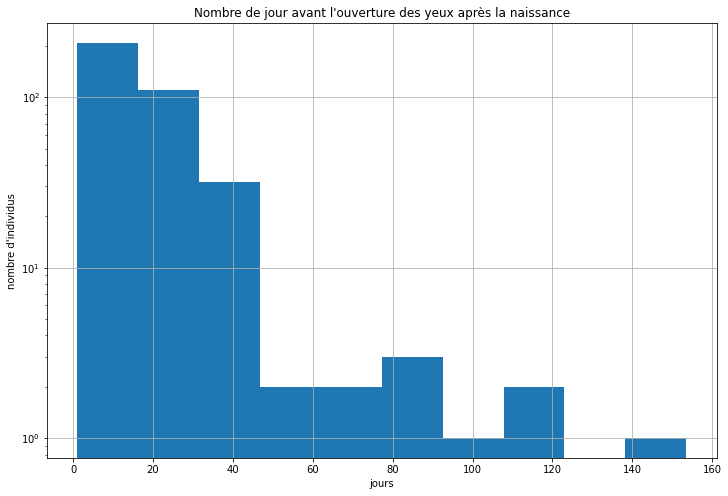

In [650]:
plotCaracteristic(filtered_adult_body_mass_g.apply(lambda x: g_to_kg(x)), "masse (kg)", "nombre d\'individus",
                  "Masse corporelle des animaux à leur âge adulte", True)
plotCaracteristic(age_at_eye_opening, "jours", "nombre d\'individus",
                  "Nombre de jour avant l'ouverture des yeux après la naissance", True)